## Create Lat & Lon Combos

In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding cities.
cities=[]

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the count to confirm sufficient count
len(cities)



617

# 6.2.6

In [5]:
# 1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
# 2. Loop through the cities list.
# 3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    # Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# 4. Build the city_url or endpoint for each city.
# 5. Log the URL and the record and set numbers.
# 6. Make an API request for each city.
# 7. Parse the JSON weather data for the following:
    # City, country, and date
    # Latitude and longitude
    # Maximum temperature
    # Humidity
    # Cloudiness
    # Wind speed
# 8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.


In [6]:
# 1. Import dependencies 
from datetime import datetime


In [7]:
# 1. Create empty list to hold weather data for #3.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval      
------------------------------


In [8]:
# # 2. Loop through all cities in list.
# for i in range(len(cities)):
    
#     # Group cities in sets of 50 for loggin purposes.
#     for (i % 50 == 0 and i >= 50):
#         set_count = +- 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | yerofey pavlovich
Processing Record 3 of Set 1 | nchelenge
Processing Record 4 of Set 1 | canto do buriti
Processing Record 5 of Set 1 | narsaq
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | belmonte
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | cairns
Processing Record 12 of Set 1 | buraydah
Processing Record 13 of Set 1 | windsor
Processing Record 14 of Set 1 | leningradskiy
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | tidore
City not found. Skipping...
Processing Record 17 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | christchurch
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | barrow
Processing Record 23 of Set

Processing Record 37 of Set 4 | mogadishu
Processing Record 38 of Set 4 | palmer
Processing Record 39 of Set 4 | marion
Processing Record 40 of Set 4 | bereda
Processing Record 41 of Set 4 | karpathos
Processing Record 42 of Set 4 | okhotsk
Processing Record 43 of Set 4 | vostok
Processing Record 44 of Set 4 | buluang
Processing Record 45 of Set 4 | hilo
Processing Record 46 of Set 4 | roebourne
Processing Record 47 of Set 4 | rio gallegos
Processing Record 48 of Set 4 | saskylakh
Processing Record 49 of Set 4 | the valley
Processing Record 50 of Set 4 | dutlwe
Processing Record 1 of Set 5 | dikson
Processing Record 2 of Set 5 | hithadhoo
Processing Record 3 of Set 5 | paucartambo
City not found. Skipping...
Processing Record 4 of Set 5 | luderitz
Processing Record 5 of Set 5 | atambua
Processing Record 6 of Set 5 | blackwater
Processing Record 7 of Set 5 | pedernales
Processing Record 8 of Set 5 | hambantota
Processing Record 9 of Set 5 | mys shmidta
City not found. Skipping...
Proces

Processing Record 27 of Set 8 | kargapolye
City not found. Skipping...
Processing Record 28 of Set 8 | kozan
Processing Record 29 of Set 8 | pacifica
Processing Record 30 of Set 8 | florianopolis
Processing Record 31 of Set 8 | fairview
Processing Record 32 of Set 8 | shar
Processing Record 33 of Set 8 | saint-francois
Processing Record 34 of Set 8 | solone
Processing Record 35 of Set 8 | mesyagutovo
Processing Record 36 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 37 of Set 8 | kibre mengist
Processing Record 38 of Set 8 | ishigaki
Processing Record 39 of Set 8 | samarai
Processing Record 40 of Set 8 | sault sainte marie
Processing Record 41 of Set 8 | port-cartier
Processing Record 42 of Set 8 | pokaran
Processing Record 43 of Set 8 | passa quatro
Processing Record 44 of Set 8 | eufaula
Processing Record 45 of Set 8 | senekal
Processing Record 46 of Set 8 | sivas
Processing Record 47 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 48 of Set 8

Processing Record 10 of Set 12 | el higo
Processing Record 11 of Set 12 | bend
Processing Record 12 of Set 12 | yozgat
Processing Record 13 of Set 12 | bratsk
Processing Record 14 of Set 12 | salinas
Processing Record 15 of Set 12 | santa eulalia del rio
City not found. Skipping...
Processing Record 16 of Set 12 | tselinnoye
Processing Record 17 of Set 12 | lodja
Processing Record 18 of Set 12 | jaque
Processing Record 19 of Set 12 | muhlhausen
Processing Record 20 of Set 12 | ierapetra
Processing Record 21 of Set 12 | jardim
Processing Record 22 of Set 12 | meulaboh
Processing Record 23 of Set 12 | yantikovo
Processing Record 24 of Set 12 | yerbogachen
Processing Record 25 of Set 12 | verkhoyansk
Processing Record 26 of Set 12 | namibe
Processing Record 27 of Set 12 | kalulushi
Processing Record 28 of Set 12 | soligalich
Processing Record 29 of Set 12 | ormara
Processing Record 30 of Set 12 | swellendam
Processing Record 31 of Set 12 | altamira
Processing Record 32 of Set 12 | victori

In [33]:
len(city_data)

594

# 6.2.7

In [34]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,73.92,49,75,3.00,CA,2021-07-12 01:20:20
1,Forestville,38.8451,-76.8750,84.65,78,1,5.75,US,2021-07-12 01:20:20
2,Kapaa,22.0752,-159.3190,87.78,72,20,7.00,US,2021-07-12 01:16:15
3,Buraydah,26.3260,43.9750,88.25,10,96,8.14,SA,2021-07-12 01:20:21
4,Saint-Philippe,-21.3585,55.7679,67.55,76,44,11.88,RE,2021-07-12 01:20:21
5,Kathu,7.9178,98.3332,82.62,99,91,10.40,TH,2021-07-12 01:20:22
6,Bacolod,10.6667,122.9500,84.34,72,44,2.95,PH,2021-07-12 01:18:39
7,Chuy,-33.6971,-53.4616,47.30,86,15,6.35,UY,2021-07-12 01:20:22
8,Kasempa,-13.4584,25.8338,51.04,65,0,5.10,ZM,2021-07-12 01:20:23
9,Myaundzha,63.0494,147.1858,56.88,77,100,7.67,RU,2021-07-12 01:20:23


In [60]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2021-07-12 01:20:20,62.4560,-114.3525,73.92,49,75,3.00
1,Forestville,US,2021-07-12 01:20:20,38.8451,-76.8750,84.65,78,1,5.75
2,Kapaa,US,2021-07-12 01:16:15,22.0752,-159.3190,87.78,72,20,7.00
3,Buraydah,SA,2021-07-12 01:20:21,26.3260,43.9750,88.25,10,96,8.14
4,Saint-Philippe,RE,2021-07-12 01:20:21,-21.3585,55.7679,67.55,76,44,11.88
5,Kathu,TH,2021-07-12 01:20:22,7.9178,98.3332,82.62,99,91,10.40
6,Bacolod,PH,2021-07-12 01:18:39,10.6667,122.9500,84.34,72,44,2.95
7,Chuy,UY,2021-07-12 01:20:22,-33.6971,-53.4616,47.30,86,15,6.35
8,Kasempa,ZM,2021-07-12 01:20:23,-13.4584,25.8338,51.04,65,0,5.10
9,Myaundzha,RU,2021-07-12 01:20:23,63.0494,147.1858,56.88,77,100,7.67


In [61]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the city_data into a csv.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1

## Get Data for Plotting

In [62]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

## Plot lat vs max_temps

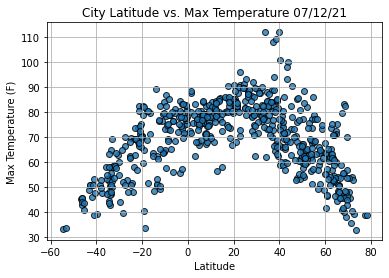

In [63]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show the plot.
plt.show()

# 6.3.2

## Plot lat vs humidity

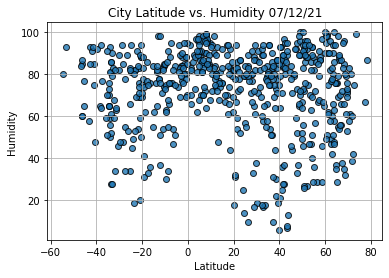

In [64]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show the plot.
plt.show()

# 6.3.3

## Plot lat vs cloudiness

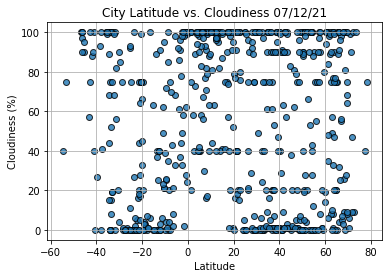

In [65]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show the plot.
plt.show()

# 6.3.4

## Plot lat vs wind speed

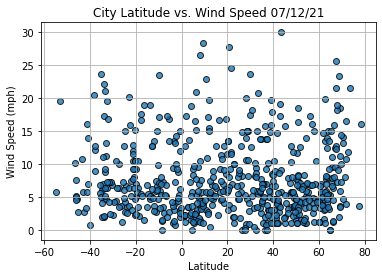

In [66]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show the plot.
plt.show()

# 6.4.2

## Create linear regression function

In [104]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [105]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2021-07-12 01:17:32
Lat                         -54.8
Lng                         -68.3
Max Temp                    33.46
Humidity                       80
Cloudiness                     40
Wind Speed                   5.75
Name: 13, dtype: object

In [106]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
589    False
590     True
591     True
592     True
593     True
Name: Lat, Length: 594, dtype: bool

In [107]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2021-07-12 01:20:20,62.4560,-114.3525,73.92,49,75,3.00
1,Forestville,US,2021-07-12 01:20:20,38.8451,-76.8750,84.65,78,1,5.75
2,Kapaa,US,2021-07-12 01:16:15,22.0752,-159.3190,87.78,72,20,7.00
3,Buraydah,SA,2021-07-12 01:20:21,26.3260,43.9750,88.25,10,96,8.14
5,Kathu,TH,2021-07-12 01:20:22,7.9178,98.3332,82.62,99,91,10.40


In [108]:
# Create Northern and Soutern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

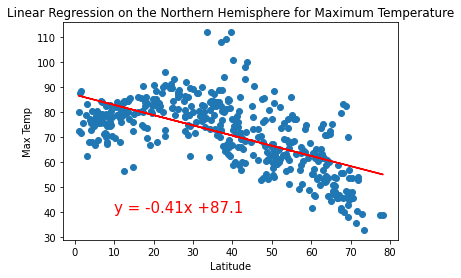

In [109]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(10,40))

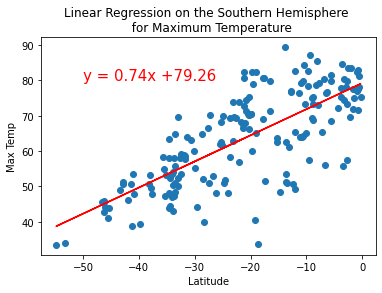

In [115]:
# Linear regression on the Max Temp for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n  for Maximum Temperature', 'Max Temp',(-50,80))

# 6.4.3

## Find correlation between lat and % humidity

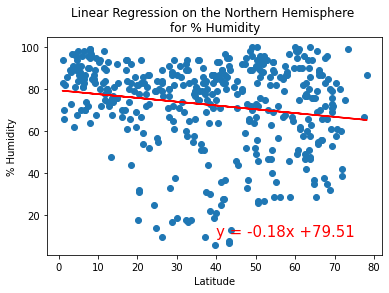

In [116]:
# Linear regression on the Northern Hemisphere and Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

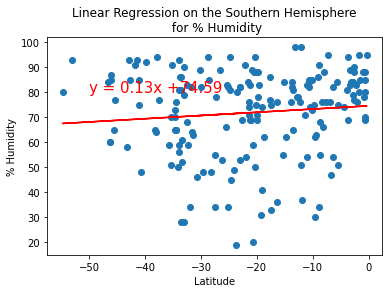

In [117]:
# Linear regression on the Southern Hemisphere and Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-50,80))

# 6.4.4

## Correlation between lat and % cloudiness

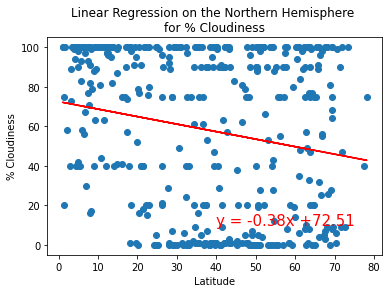

In [118]:
# Linear regression on the Northern Hemisphere and Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,10))

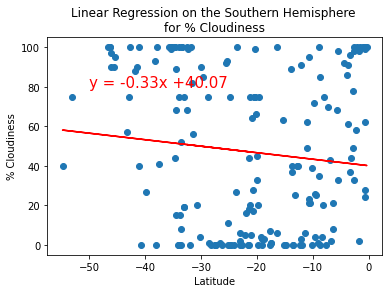

In [135]:
# Linear regression on the Southern Hemisphere and Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,80))

# 6.4.5

## Correlation between lat and wind speed

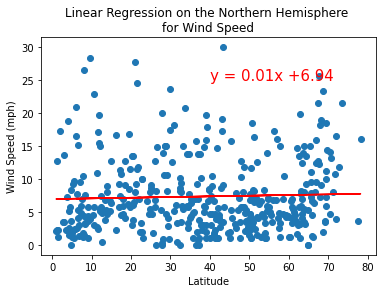

In [136]:
# Linear regression on the Northern Hemisphere and wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed (mph)',(40,25))

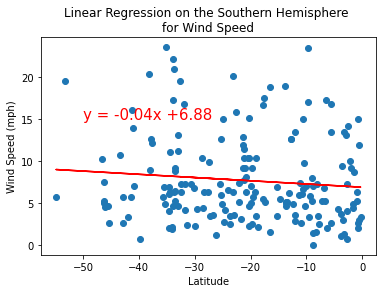

In [137]:
# Linear regression on the Southern Hemisphere and wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed (mph)',(-50,15))

# 6.5.1

## Setting up Google Maps & Places API